# Texts and Words

<div class="alert alert-block alert-info">
<b>Code Update:</b> The string method <code>lower()</code> has been added to the tokenization process. We do not need the NLTK Text object, so it isn't created here.
</div>

*If you want to know how to get these colored "callout" boxes, see [IBM's markdown guide](https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet).*

In [1]:
# Imports
import re
import nltk

# Open and read the file to create a string object
mdg_string = open('../data/mdg.txt', 'r').read()
# Create a list of substrings, aka words
mdg_words = nltk.tokenize.word_tokenize(mdg_string.lower())

# Repeat for "Heart of Darkness"
hod_string = open('../data/hod.txt', 'r').read()
hod_words = nltk.tokenize.word_tokenize(hod_string.lower())

There are many ways to create a frequency list. Three are below: using built-in functions, using the `nltk`, and using `pandas`. 

### Built-In

In [2]:
# Using a dictionary
mdg_dict = {}
for word in mdg_words:
    try:
        mdg_dict[word] += 1
    except: 
        mdg_dict[word] = 1

# When in doubt print something out
print(f"mdg_dict is a {type(mdg_dict)} of {len(mdg_dict)} entries (tokens).")

mdg_dict is a <class 'dict'> of 1934 entries (tokens).


In [3]:
# Dictionaries are key, value pairs.
# To retrieve a value, enter the key:
mdg_dict["hunter"]

11

In [4]:
# Knowing this, you can actually get the most frequent tokens. 
# (This is not suggested as it's difficult to read.)
# What would you change to get the least frequent tokens?
for word in sorted(mdg_dict, key=mdg_dict.get, reverse=False)[0:10]:
    print(word, mdg_dict[word])

mystery 1
charts 1
'ship-trap 1
replied 1
suggestive 1
superstition 1
peer 1
dank 1
tropical 1
palpable 1


### pandas

This is my preferred way, for a variety of reasons, and I'm going to show it to you quickly and without much explanation just for reference before proceeding to walk through the `nltk` code.

In [5]:
# First import the pandas library
import pandas as pd

# Then use my preferred way to turn a string of words into a list of words
words = re.sub("[^a-zA-Z']"," ", mdg_string).lower().split()

# Then create a pandas series
mdg_series = pd.Series(words)

# pandas series are a particular data structure
mdg_series.head()

0      off
1    there
2       to
3      the
4    right
dtype: object

In [6]:
mdg_series.shape

(8017,)

In [7]:
mdg_counts = mdg_series.value_counts()
print(mdg_counts[0:5])

the    512
a      258
he     248
of     172
and    164
Name: count, dtype: int64


In [8]:
mdg_counts.shape

(1947,)

<Axes: >

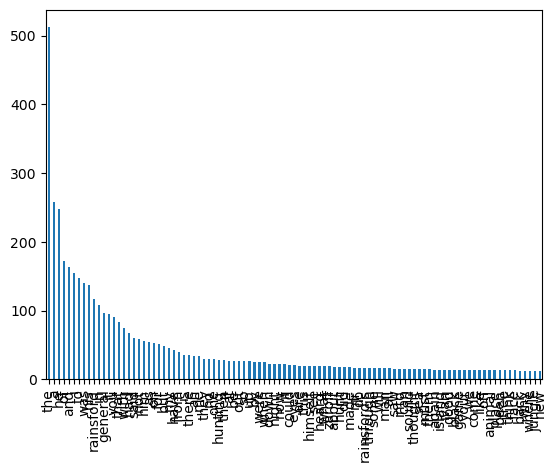

In [9]:
# pandas makes certain kinds of graphing very easy
mdg_counts.iloc[0:99].plot(kind='bar')

In [10]:
# One of the niceties of working with pandas
mdg_counts.to_csv("mdg-counts.csv")

### NLTK

There are two ways forward: using only NLTK functions or, in the second cell below, combining using preferred word list with the NLTK's `FreqDist` functionality.

In [11]:
fdist = nltk.FreqDist()
for sentence in nltk.tokenize.sent_tokenize(mdg_string):
    for word in nltk.tokenize.word_tokenize(sentence):
        fdist[word] += 1

fdist.most_common(10)

[('.', 640),
 (',', 556),
 ('the', 439),
 ('a', 246),
 ('``', 223),
 ("''", 210),
 ('I', 178),
 ('he', 173),
 ('of', 171),
 ('and', 155)]

In [12]:
mdg_dist = nltk.FreqDist()
for word in words:
    mdg_dist[word] +=1

mdg_dist.most_common(10)

[('the', 512),
 ('a', 258),
 ('he', 248),
 ('of', 172),
 ('and', 164),
 ('i', 155),
 ('to', 148),
 ('was', 140),
 ('his', 137),
 ('rainsford', 117)]

In [13]:
# If you ask Python what kind of data structure freq_dist is,
# you'll get a rather unhelpful response, but LOOK ABOVE. What do you see?
type(mdg_dist)

nltk.probability.FreqDist

In [14]:
# We can work with freq_dist like any list of tuples

for word, frequency in mdg_dist.most_common(10):
    print(f"{word}:  {frequency}")

the:  512
a:  258
he:  248
of:  172
and:  164
i:  155
to:  148
was:  140
his:  137
rainsford:  117


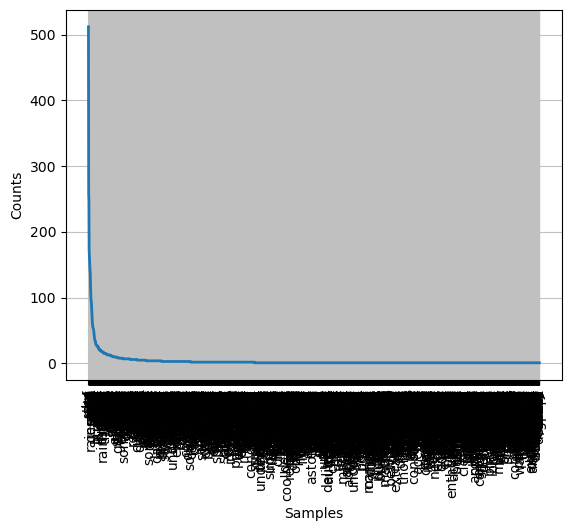

<Axes: xlabel='Samples', ylabel='Counts'>

In [15]:
# freq_dist comes with a lot of functionality
# (See Table 3.1 in Chapter 1 of the NLTK book for more ideas.)

mdg_dist.plot()

# More Texts, More Words

### Lexical Diversity

In [16]:
def lex_div (text):
    lexdiv =len(set(text)) / len(text)
    return lexdiv


In [19]:
# Note how you can run a function inside an f-string.
# Also note the use of backslashes to escape the quotation marks.
print(f"The lexical diversity of \"The Most Dangerous Game\" is {lex_div(mdg_words):.3f}")

The lexical diversity of "The Most Dangerous Game" is 0.195


In [21]:
print(f"The lexical diversity of \"Heart of Darkness\" is {lex_div(hod_words):.3f}")

The lexical diversity of "Heart of Darkness" is 0.124


In [22]:
# We need a more robust function to handle a series of files
def lex_div(a_file):
    # open and read the file
    the_string =  open(a_file, 'r').read()
    # create a list of words
    the_words = re.sub("[^a-zA-Z']"," ", the_string).lower().split()
    # divide the vocabular by the total number of words
    lexdiv = len (set (the_words)) / len (the_words)
    # return this percentage
    return lexdiv

In [23]:
data = ["A", "B", "C", "D", "E", "F", "G", "H"]

for i in data:
    the_file = "../data/1924/texts/"+i+".txt"
    lexdiv = lex_div(the_file)
    print(f"{i}: {lexdiv:.3f}")

A: 0.326
B: 0.308
C: 0.233
D: 0.283
E: 0.237
F: 0.284
G: 0.259
H: 0.246


*Hmmm* ... that's quite a range. Referring to the lexical diversities for "The Most Dangerous Game" and _Heart of Darkness_, what do you think is at work there? 

What happens if we add a text as a data point?

In [24]:
hamlet = "../data/hamlet.txt"
lex_div(hamlet)

0.13837755875663382

<div class="alert alert-block alert-warning">
<b>Your turn:</b> Write code that explores the possible dimension in play here.
</div>